## Indian Start-up Funding Analysis


### Project Scenario
The Team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, I was tasked to:

- Investigate the ecosystem and propose the best course of action.
  - Analyze funding received by start-ups in India from 2018 to 2021.
  - Separate data for each year of funding will be provided.
  - Find the start-ups’ details, the funding amounts received, and the investors' information.

### Business Understanding
The Indian startup ecosystem has experienced significant growth and investment over the past few years. As a data expert tasked with investigating this ecosystem, our goal is to analyze the funding received by startups in India from 2018 to 2021 and provide insights to guide investment decisions. By examining the details of startups, funding amounts, and investor information, we aim to understand the trends, opportunities, and challenges within the Indian startup landscape.

### Objective
To analyze funding trends and dynamics within the Indian start-up ecosystem from 2018 to 2021 and propose strategic recommendations for the team's venture.

### Hypothesis Testing
Null Hypothesis(Ho): There is no siginificate difference in the amount of funding between startups in Bangalore.
Alternative Hypothesis(Ha): There is a siginificate difference in the amount of funding between startups in Banaglore.

### Business Questions
####
1.What sectors have shown the highest growth in terms of funding received over the past four years?

2.What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

3.Are there any notable differences in funding patterns between early-stage startups and more established companies?

4.Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India.

5.Which investors have more impact on startups over the years?

6.What are the key characteristics of startups that successfully secure funding, and how do they differ from those that struggle to attract investment?

In [1]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                      
import re     
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat 
import geopandas as gpd
#import geoplot as gplt
import folium
from folium.plugins import MarkerCluster
from scipy.stats import mannwhitneyu
#from geopy.geocoders import Nominatim    
from scipy.stats import ttest_ind    
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


### First Data Set
The first data was from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. <br>
Two tables were read from the databases. That is, <br>
Table 1: dbo.LP1_startup_funding2020 <br>
Table 2: dbo.LP1_startup_funding2021


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [3]:
# Create a connection string
connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary
connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
query = "Select * from dbo.LP1_startup_funding2020"
table_1 = pd.read_sql(query, connection)


In [6]:
query = "Select * from dbo.LP1_startup_funding2021"
table_2 = pd.read_sql(query, connection)

In [7]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [8]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [9]:
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [10]:
table_1[table_1['column10'].notna()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


#### Drop column10 in table_1 since it has just two values that are not null and are also just repetition of values in Stage column 

In [11]:
# Drop column10
table_1.drop('column10', axis=1, inplace=True) if 'column10' in table_1.columns else table_1
table_1.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [12]:
# Function to clean the column names

def stripper(string: str, strip: list) -> str:
    """Strips a strip list from a given string and returns the string"""
    for s in strip:
        string = string.replace(s, '')
        
    return string
    
def replacer(string: str, replace: list) -> str:
    """Replaces each character in replace list with underscore given a string and returns the string"""
    for r in replace:
        string = string.replace(r, '_')
                
    return string
    
def clean_column_names(df):
    strip   = ['(', ')', '$']
    replace = [' ', '/'] 
    df.columns = [replacer(stripper(col_name.lower(), strip), replace) for col_name in df.columns]
    return df


In [13]:
# Clean the column names
table_1 = clean_column_names(table_1)
table_2 = clean_column_names(table_2)

In [14]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1055 non-null   object 
 1   founded        842 non-null    float64
 2   headquarter    961 non-null    object 
 3   sector         1042 non-null   object 
 4   what_it_does   1055 non-null   object 
 5   founders       1043 non-null   object 
 6   investor       1017 non-null   object 
 7   amount         801 non-null    float64
 8   stage          591 non-null    object 
dtypes: float64(2), object(7)
memory usage: 74.3+ KB


In [15]:
table_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  1209 non-null   object 
 1   founded        1208 non-null   float64
 2   headquarter    1208 non-null   object 
 3   sector         1209 non-null   object 
 4   what_it_does   1209 non-null   object 
 5   founders       1205 non-null   object 
 6   investor       1147 non-null   object 
 7   amount         1206 non-null   object 
 8   stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


## Create year column to identify each dataset

In [16]:
# Table 1: dbo.LP1_startup_funding2020
table_1['year'] = 2020

# Table 2: dbo.LP1_startup_funding2021
table_2['year'] = 2021

### First Data Set



In [17]:
# First Data set
first_dataset = pd.concat([table_1, table_2], ignore_index=True)

first_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2264 non-null   object 
 1   founded        2050 non-null   float64
 2   headquarter    2169 non-null   object 
 3   sector         2251 non-null   object 
 4   what_it_does   2264 non-null   object 
 5   founders       2248 non-null   object 
 6   investor       2164 non-null   object 
 7   amount         2007 non-null   object 
 8   stage          1372 non-null   object 
 9   year           2264 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 177.0+ KB


In [18]:
first_dataset['amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

## Second Data Set

In [20]:
# Load dataset
second_dataset = pd.read_csv('My data/startup_funding2019.csv')

second_dataset = clean_column_names(second_dataset)

second_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  89 non-null     object 
 1   founded        60 non-null     float64
 2   headquarter    70 non-null     object 
 3   sector         84 non-null     object 
 4   what_it_does   89 non-null     object 
 5   founders       86 non-null     object 
 6   investor       89 non-null     object 
 7   amount         89 non-null     object 
 8   stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [21]:
second_dataset['amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

## Third Data Set

In [22]:
# Load dataset
third_dataset = pd.read_csv('My data/startup_funding2018.csv')

third_dataset = clean_column_names(third_dataset)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_name   526 non-null    object
 1   industry       526 non-null    object
 2   round_series   526 non-null    object
 3   amount         526 non-null    object
 4   location       526 non-null    object
 5   about_company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [23]:
third_dataset['amount'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [24]:
# Fix location values, take every letter before the first comma as headquarter
third_dataset['location'] = [location.split(',')[0] for location in third_dataset['location']]


In [25]:
# Rename round_series to stage and location to headquarter
third_dataset.rename(columns={
    'company_name': 'company_brand', 
    'industry': 'sector', 
    'round_series': 'stage', 
    'about_company': 'what_it_does', 
    'location': 'headquarter'
    },
    inplace=True
)

third_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_brand  526 non-null    object
 1   sector         526 non-null    object
 2   stage          526 non-null    object
 3   amount         526 non-null    object
 4   headquarter    526 non-null    object
 5   what_it_does   526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


## Create Year column to identify each dataset


In [26]:
# Create year column

# The second data is a flat-file name startup_funding2019.csv
second_dataset['year'] = 2019

# The third part of the data flat-file named startup_funding2018.csv
third_dataset['year']  = 2018

# Create the final concatenated dataset

In [27]:
# Final Data set
final_dataset = pd.concat([first_dataset, second_dataset, third_dataset], ignore_index=True)

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   stage          1941 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


In [28]:
final_dataset.head()

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020


### Cleaning Columns

- Headquarter & Sector column
    - If column value contains '#REF!', clean it and shift the row starting from that column by 1 step and until the stage column
    - Sanitize sector column if after cleaning and shifting, but the sector value is also present among unique values of the headquarter column
    - Fixes index 1297, 1312, 2155

In [29]:
# Function to remove '#REF!' in a series
def remove_ref(value):
    if isinstance(value, str):
        value = value.replace('#REF!', '').strip()
            
    return value

# Columns of Interest 
columns = ['headquarter', 'investor']
for column in columns:    
    # Identify rows where column value contains '#REF!
    mask = final_dataset[column].str.contains('#REF!')
    
    # Fill missing values in mask with False
    mask.fillna(False, inplace=True)
    
    # Update the column by applying the remove_ref function to the column
    final_dataset.loc[mask, column] = final_dataset.loc[mask, column].apply(remove_ref)
    
    # Shift values in selected rows excluding the last column 'year'
    final_dataset.loc[mask, column:'stage'] = final_dataset.loc[mask, column:'stage'].shift(1, axis=1)


# Sanitisizing the sector column after shifting
mask = final_dataset['sector'].apply(lambda x: x in final_dataset['headquarter'].unique())

# Update 'headquarter' value with 'sector' value
final_dataset.loc[mask, 'headquarter'] = final_dataset.loc[mask, 'sector']

# Set the 'sector' value to NaN
final_dataset.loc[mask, 'sector'] = np.nan          

#### Replace 'None' string values with NaN element-wise allowing for consistent representation of missing values

In [30]:
# Function replace None with NaN
def replace_none(value):
    if isinstance(value, str) and (value.lower() == 'none' or value.lower() == 'nan'):
        value = np.nan
    
    return value

# Apply the function to all columns
final_dataset = final_dataset.applymap(replace_none) # element-wise

In [31]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2751 non-null   object 
 3   sector         2781 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2252 non-null   object 
 7   amount         2623 non-null   object 
 8   stage          1945 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 225.1+ KB


#### If a value in stage column is a website link, its correct value is NaN

**Website link in stage column is https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593**

In [32]:
# Function to remove website link from stage column
def remove_website_link(value):
    # Regular expression pattern to match website URLs that begin with http:// or https:// with an optional www
    pattern = r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?'
    
    # Check if the value is a string and matches the pattern
    if isinstance(value, str) and re.match(pattern, value):
        return np.nan
    else:
        return value

In [33]:
# Remove website link values from the stage column
final_dataset['stage'] = final_dataset['stage'].apply(remove_website_link)

#### Exchange rates 

[Source: OFX](https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/)
```bash
exchange_rates = {
    2018: 0.014649,
    2019: 0.014209,
    2020: 0.013501,
    2021: 0.013527
}

In [34]:
# Function to clean amount values
def floater(string):
    try:
        string = float(string)
    except ValueError:
        string = np.nan
    
    return string
    
def clean_amount(row): 
    amount = row[0]    
    year   = row['year'] 
    
    # Source: https://www.ofx.com/en-au/forex-news/historical-exchange-rates/yearly-average-rates/
    exchange_rates = {
        2018: 0.014649,
        2019: 0.014209,
        2020: 0.013501,
        2021: 0.013527
    }
    
    exchange_rate = exchange_rates[year]   
    
    # Convert to string
    amount = str(amount)   
    
    if isinstance(amount, str):        
        # Set of elements to replace
        to_replace = {' ', ','}

        # Replace each element in the set with an empty string
        for r in to_replace:
            amount = amount.replace(r, '')        
                        
        if amount == '' or amount == '—': 
            amount = np.nan
        # If the amount is in INR (Indian Rupees), convert it to USD using the conversion rate of the year
        elif '₹' in amount:
            amount = amount.replace('₹', '')
            amount = floater(amount) * exchange_rate
        
        # If the amount is in USD, remove the '$' symbol and convert it to a float
        elif '$' in amount:
            amount = amount.replace('$', '')
            amount = floater(amount)
        else:
            amount = floater(amount)

    
    return amount


In [35]:
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector            98
what_it_does       0
founders         545
investor         627
amount           256
stage            935
year               0
dtype: int64

#### If the investor value is a number or contains $, the correct value for amount if missing is the investor value, the correct value for stage is the old amount value and the investor value becomes NaN or missing

In [36]:
# Identify rows where 'investor' value is numeric using clean amount function
mask = final_dataset[['investor', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update 'stage' column with the 'amount' value if stage is NaN
stage_mask = final_dataset['stage'].isna()
final_dataset.loc[mask & stage_mask, 'stage']    = final_dataset.loc[mask, 'amount']

# Update 'amount' column with 'investor' value
final_dataset.loc[mask, 'amount']                = final_dataset.loc[mask, 'investor']

# Set 'investor' to NaN
final_dataset.loc[mask, 'investor']              = np.nan
         


#### If the 'stage' value is a number or contains $, the column 'what_it does' becomes its old value concatenated with the value in the 'founder' column. The correct value for 'founder' is the 'investor' value and the correct value for 'investor' is the 'amount' value and correct 'amount' becomes the old 'stage' value while the correct value for 'stage' is NaN or missing. 


In [37]:
# Identify rows where 'stage' value is numeric using clean amount function
mask = final_dataset[['stage', 'year']].apply(lambda row: pd.notna(clean_amount(row)), axis=1)

# Update the 'what_it_does' column to its concatenation with 'founder' value
old_what_it_does = final_dataset.loc[mask, 'what_it_does']
old_founder      = final_dataset.loc[mask, 'founders']

final_dataset.loc[mask, 'what_it_does']    = old_what_it_does.fillna('') + ' ' + old_founder.fillna('')

# Update 'founder' column using the old 'investor' value
final_dataset.loc[mask, 'founders']        = final_dataset.loc[mask, 'investor']

# Update 'investor' column using the old 'amount' value
final_dataset.loc[mask, 'investor']        = final_dataset.loc[mask, 'amount']

# Update 'amount' column using the old 'stage' value
final_dataset.loc[mask, 'amount']          = final_dataset.loc[mask, 'stage']

# Set 'stage' to NaN
final_dataset.loc[mask, 'stage']           = np.nan

#### Clean and convert amounts to USD and rename colume from amount to amount($)

In [38]:
# Clean and convert amounts to USD considering the average exchange rate per year
final_dataset['amount'] = final_dataset[['amount','year']].apply(lambda row: clean_amount(row), axis=1)


In [39]:
final_dataset.rename(columns={'amount': 'amount($)'}, inplace=True)

#### Cleaning the Headquarter Column

In [40]:
# Fix headquarter values, take every word before the first comma as headqurter
def splitter(value):
    """
    Splits a string by comma and returns the first part.

    Args:
        value (str or None): The value to be split.

    Returns:
        str or None: The first part of the string before the first comma, or the original value if the input is not a string.
    """
    return value.split(',')[0] if isinstance(value, str) else value

final_dataset['headquarter'] = [splitter(hq) for hq in final_dataset['headquarter']]

### Cleaning the Sector Column

In [41]:
# Refactoring
def heal_column_from_chars(df: pd.DataFrame, column: str = 'sector', chars: list = [',', ' ', '&', 'and', '/']) -> pd.DataFrame:
    """
    Returns a dataframe with the sector column having the least redundant value for sector.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to clean.
        column (str): The name of the column to clean. Defaults to 'sector'.
        chars (list): A list of characters or substrings to handle. Defaults to [',', ' ', '&', 'and', '/']. 
                      Always start with ',' because comma separated sector the most occuring multiple sector value.   
        
    Returns:
        pd.DataFrame: The DataFrame with the specified column cleaned.
    """
    
    def count_char(value, char):
        """
        Finds all occurrences of char in value and returns the count.
        
        Parameters:
            value (str): The string in which to search for occurrences of char.
            char (str): The character to count occurrences of.
        
        Returns:
            int: The count of occurrences of char in value.
        """
        # Use re.findall to find all occurrences of char in value and return the count
        return len(re.findall(re.escape(char), str(value)))
    
    def char_to_nochar_value(char_value, char, no_char_column):
        """
        Find the equivalent value of char_value in no_char_column.
        
        Parameters:
            char_value (str): The string to process.
            char (str): The character to split the char_value string.
            no_char_column (pd.Series): The column containing unique values to search for the equivalent value.
        
        Returns:
            str: The equivalent value found in no_char_column.
        """
        
        # Default no char value        
        no_char_value = char_value 
        
        # Split by char, if char='and', "Food and Beverage" = ["Food ", " Beverage"]
        char_value    = char_value.split(char) 
        
        # After, char_value is split, update no_char_value only if char is a comma
        no_char_value = char_value[0] if char==',' else no_char_column
        other_value = ''
            
        def find_index(where, value):
            """
            Find the index where the given value matches the elements in the Series 'where'.
            
            Parameters:
                where (pd.Series): The Series containing strings to search for the value.
                value (str): The value to search for.
            
            Returns:
                np.ndarray: The array of indices where the value matches in the Series.
            """
            return np.where(where.str.lower().unique() == value.strip(char).lower())[0]
            
        for value in char_value: 
            other_value = other_value + char + value
            # Find the index of value in unique no_char_column
            indexof_value = find_index(where=no_char_column, value=value)
            
            # Find the index of other value in unique no_char_column
            indexof_othervalue = find_index(where=no_char_column, value=other_value)
            
            if indexof_value.size == 1:
                # If a unique match is found, update no_char_value
                no_char_value = value              
                break
            elif indexof_othervalue.size == 1:  
                # If a unique match is found, update no_char_value
                no_char_value = other_value              
                break
            else:
                pass
                
        return no_char_value
        
    for char in chars: 
                
        char_list = [count_char(value, char) for value in df[column]]
                
        char_threshold =  0

        mask_char      = [x > char_threshold for x in char_list]    # Mask Boolean

        mask_no_char   = [not x for x in mask_char]
        
        char_column    = df.loc[mask_char, column]

        no_char_column = df.loc[mask_no_char, column]                

        # Convert 'char' column to no 'char' column in the dataframe if there is a no 'char' equivalent    
        df.loc[mask_char, column] = char_column.apply(lambda x: char_to_nochar_value(x, char, no_char_column))
    
    return df  


In [65]:
# Cleaning the sector column
final_dataset= heal_column_from_chars(final_dataset)

AttributeError: 'Series' object has no attribute 'split'

- Sector- handling missing values

In [55]:
def fill_missing_sector(value):
    """
    Fill missing sector values based on the content of 'what_it_does' column.

    Parameters:
    value (str): The content of the 'what_it_does' column.

    Returns:
    str: The assigned sector based on the content of 'what_it_does'.
    """
    stopwords   = ['it', "a", "an", "the", "and", "but", "or"]  # Add other stopwords to exclude
    
    # Add more sectors and keywords
    sector_keywords = {
        'Technology': ['platform', 'platforms', 'platform.', 'applications', 'digital', 'digitizes'],
        'Waste management': ['waste'],
        'Skill development': ['skill, development'], 
        'Commerce': ['ecommerce'],
        'Cosmetics':['skincare'],
        'Rental': ['space'],
        'HR': ['workforce'],
        'Finance': ['financial'],
        'Automobile': ['tyre'],
        'EdTech': ['edutech']
                        
    }
        
    sector  = 'Others' # Default sector if no match is found
    
    sectors = final_dataset['sector']
    
    values  = [v for v in value.split(' ') if v.lower() not in stopwords]
    
    for v in values:
         # Find the index of the sector in the sectors column
        index_sector = np.where(sectors.str.lower().unique() == v.lower())[0] # Find the index of sector in unique sectors
        
        # If a match is found, assign the corresponding sector
        if index_sector.size == 1:        
            sector = sectors.unique()[index_sector[0]]              
            break 
        # If no match is found, search for the word, v in the sector keywords dictionary and assign the corresponding sector 
        else:
            sector = next((sector for sector, keywords in sector_keywords.items() if v.lower() in keywords), sector)
    
    return sector

mask = final_dataset['sector'].isna()

final_dataset.loc[mask, 'sector'] = final_dataset.loc[mask, 'what_it_does'].apply(fill_missing_sector)

TypeError: unhashable type: 'Series'

#### Replace falsely unique values or actual duplicates in categorical and string columns with their first occurence in the final_dataset

In [56]:
# Heuristic Function to replace actual duplicates with first occurrence
def replace_col_duplicates(column):
    """
        Replaces duplicates values (identified through some heuristics) in a column with their first occurrence 
        Although the first occurrence might not be the best representation but it allows for consistency in values
        
        Parameter: column
        Returns  : column with consistent representation of values
    
    """
    actual_strings = {}  # Dictionary to store the first occurrence of each modified string
    
    def replace_string(string):
        actual_string = re.sub(r'[^\w]', '', string).lower() if isinstance(string, str) else string   # Replace all special characters including whitespaces with '' 
        if actual_string in actual_strings:
            return actual_strings[actual_string]
        else:
            actual_strings[actual_string] = string
            return string
    return column.apply(replace_string)


In [51]:
columns_of_interest = ['company_brand', 'headquarter', 'sector', 'founders', 'investor', 'stage']

In [52]:
def count_unique_values(columns):
    for col in columns:
        # Print count of unique items in columns of interest
        print(f'{col}: {len(final_dataset[col].unique())}\n')

In [57]:
# Count of unique values before running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2214

headquarter: 131



TypeError: unhashable type: 'Series'

In [58]:
# Apply the replace actual duplicates function to the string or categorical columns
for col in columns_of_interest:
    final_dataset[col] = replace_col_duplicates(final_dataset[col])


TypeError: unhashable type: 'Series'

In [59]:
# Count of unique values after running replace_col_duplicates function
count_unique_values(columns_of_interest)

company_brand: 2133

headquarter: 130



TypeError: unhashable type: 'Series'

In [60]:
# Check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector            99
what_it_does       0
founders         545
investor         630
amount($)        556
stage            940
year               0
dtype: int64

#### Drop duplicated rows in final data set

In [61]:
# Drop duplicated from final dataset
final_dataset.drop_duplicates(inplace=True)

TypeError: unhashable type: 'Series'

In [66]:
# Again, check the number of missing values in the columns of final dataset
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector            99
what_it_does       0
founders         545
investor         630
amount($)        556
stage            940
year               0
dtype: int64

#### Change each column (founded and year) to appropriate Data types

In [67]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2751 non-null   object 
 3   sector         2780 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2249 non-null   object 
 7   amount($)      2323 non-null   float64
 8   stage          1939 non-null   object 
 9   year           2879 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 225.1+ KB


In [68]:
# Founded is year and datatype should be integer 32 handling missing values gracefuly
final_dataset['founded'] = final_dataset['founded'].astype('Int32') # Int32 instead of int32

In [69]:
# Year does not need to be int64 but int32
final_dataset['year'] = final_dataset['year'].astype('int32')

In [70]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   Int32  
 2   headquarter    2751 non-null   object 
 3   sector         2780 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2249 non-null   object 
 7   amount($)      2323 non-null   float64
 8   stage          1939 non-null   object 
 9   year           2879 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 205.4+ KB


#### Handle missing values in the columns of the final dataset except company_brand, what_it_does and year which have no missing values

In [71]:
final_dataset.describe(include='all')

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount($),stage,year
count,2879,2110.0,2751,2780,2879,2334,2249,2.323000e+03,1939,2879.000000
unique,2133,<NA>,128,240,2691,1979,1769,NaN,70,NaN
top,Byju's,<NA>,Bangalore,0 AgriTech 1 EdTech 3 ...,Provides online learning classes,Byju Raveendran,Inflection Point Ventures,NaN,Seed,NaN
freq,12,<NA>,839,290,5,7,36,NaN,608,NaN
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,1.207078e+08,NaN,2020.023619
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,3.434800e+09,NaN,1.086974
min,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,1.200000e+07,NaN,2021.000000


In [72]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   Int32  
 2   headquarter    2751 non-null   object 
 3   sector         2780 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2249 non-null   object 
 7   amount($)      2323 non-null   float64
 8   stage          1939 non-null   object 
 9   year           2879 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(7)
memory usage: 205.4+ KB


In [73]:
final_dataset.isna().any()

company_brand    False
founded           True
headquarter       True
sector            True
what_it_does     False
founders          True
investor          True
amount($)         True
stage             True
year             False
dtype: bool

### Founded column

In [74]:
final_dataset['founded'].unique()

<IntegerArray>
[2019, 2018, 2020, 2016, 2008, 2015, 2017, 2014, 1998, 2007, 2011, 1982, 2013,
 2009, 2012, 1995, 2010, 2006, 1978, <NA>, 1999, 1994, 2005, 1973, 2002, 2004,
 2001, 2021, 1993, 1989, 2000, 2003, 1991, 1984, 1963]
Length: 35, dtype: Int32

In [75]:
# Impute missing values in 'founded' column with median by year
founded_median_by_year = final_dataset['founded']

### Headquarter column

### Sector column

### Founders column

### Investor column

### Amount column

### Stage column

In [76]:
final_dataset['stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', nan, 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Fresh funding', 'Post series A', 'Seed fund',
       'Series B+', 'Angel', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing

### Fill missing values and replace Undisclosed values in 'stage' column with 'Venture - Series Unknown

In [77]:
# Fill missing values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].fillna('Venture - Series Unknown', inplace=True)

# Replace Undisclosed values in 'stage' column with 'Venture - Series Unknown
final_dataset['stage'].replace(to_replace='Undisclosed', value='Venture - Series Unknown', inplace=True)


In [78]:
final_dataset['stage'].unique()

array(['Venture - Series Unknown', 'Pre-seed', 'Seed', 'Pre-series A',
       'Pre-series', 'Series C', 'Series A', 'Series B', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Pre- series A', 'Edge', 'Series H',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Bridge Round',
       'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Seed funding', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series B3', 'PE', 'Series F1', 'Pre-series A1', 'Early seed',
       'Seies A', 'Series A2', 'Series I', 'Fresh funding',
       'Post series A', 'Seed fund', 'Series B+', 'Angel',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IP

In [79]:
final_dataset.isna().sum()

company_brand      0
founded          769
headquarter      128
sector            99
what_it_does       0
founders         545
investor         630
amount($)        556
stage              0
year               0
dtype: int64

## Handling Missing Values in the Founders Column
### The dataset had 545 missing values for the founders, so we decided to drop the column for founders as we will not need it for analysis

In [80]:
final_dataset.drop('founders', axis=1, inplace=True) 

## Handling Missing Values in the Sector column
### The sector column had 18 missing values so we filled them with the value Unknown

In [81]:
final_dataset['sector'].unique()

TypeError: unhashable type: 'Series'

In [82]:
# Filling the missing values in sector column with Unkownn
final_dataset['sector'].fillna("Unknown", inplace=True)


In [83]:
len(re.sub(r'[^\,]', '', "ar345547686,,4,5,,"))

5

## Handling Missing values in the Investor Column
 

In [84]:
# Calculate the mode for each sector in the 'investor' column
mode_per_sector = final_dataset.groupby('sector')['investor'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")


# Fill missing values in the 'investor' column with the calculated mode per sector
final_dataset['investor'].fillna(mode_per_sector, inplace=True)


TypeError: unhashable type: 'Series'

In [85]:
final_dataset.isna().sum()


company_brand      0
founded          769
headquarter      128
sector             0
what_it_does       0
investor         630
amount($)        556
stage              0
year               0
dtype: int64

## Filling null values in the column for Head Quarter

In [86]:
# Set seed for reproducibility
np.random.seed(2024)

# Identify the rows with missing 'headquarter' values
mask = final_dataset['headquarter'].isna()

# Get non-missing values for final_dataset['headquarter']
non_missing_hq = final_dataset.loc[mask==False, 'headquarter'] 

hq_missing     = mask.sum()

# Randomly sample non-missing values to fill missing values of size hq_missing, 114
hq_random      = np.random.choice(non_missing_hq, size=hq_missing)

# Fill missing values with randomly sampled headquarter values
final_dataset.loc[mask, 'headquarter'] = hq_random


### Filling Null Values in Founded Column

In [87]:
# Calculate the median founded grouped by year values
founded_median_per_year = final_dataset.groupby('year')['founded'].median()

# Calculate the overall median of median_per_year
overall_median_per_year = founded_median_per_year.median()

# Fill NaN values in founded_median_per_year with the overall median of median_per_year
founded_median_per_year.fillna(overall_median_per_year, inplace=True)

# Fill missing values in the 'founded' column with the calculated median per year
final_dataset['founded'].fillna(final_dataset['year'].map(founded_median_per_year), inplace=True)

### Filling Null Values in the Amount column

In [88]:
amount_median = final_dataset['amount($)'].median()
final_dataset['amount($)'].fillna(amount_median, inplace=True)

In [89]:
final_dataset.isna().sum()

company_brand      0
founded            0
headquarter        0
sector             0
what_it_does       0
investor         630
amount($)          0
stage              0
year               0
dtype: int64

# Save datasets as flat files

In [90]:
# Dataset from Microsoft SQL database
# first_dataset.to_csv('DataSets/individual_csv/startup_funding2020-2021.csv')

In [91]:
# Final merged dataset with cleaned column names and cleaned amount values
# final_dataset.to_csv('DataSets/final_csv/startup_funding2018-2021.csv')

array([[<Axes: title={'center': 'founded'}>,
        <Axes: title={'center': 'amount($)'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

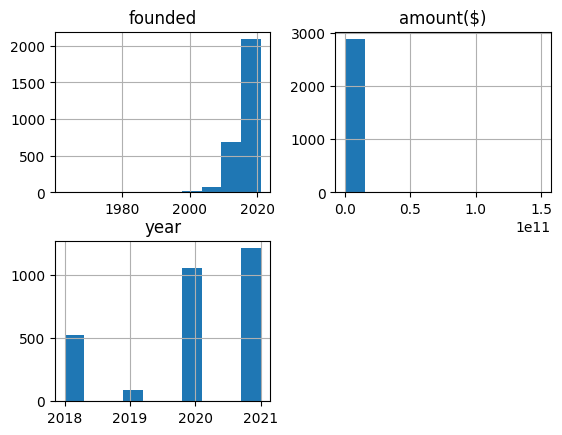

In [92]:
final_dataset.hist()

### Test

In [93]:
startups_in_bangalore = final_dataset[final_dataset['headquarter']=='Bangalore']
startups_not_in_bangalore = final_dataset[final_dataset['headquarter']!='Bangalore']

- Mann-Whitney U test: amount($) values are not normally distributed

In [94]:
# Perform Mann-Whitney U test
t, p = mannwhitneyu(startups_in_bangalore['amount($)'],startups_not_in_bangalore['amount($)'], alternative='two-sided')

# Print the test statistic and p-value
print("Mann-Whitney U test statistic:", t)
print("P-value:", p)

Mann-Whitney U test statistic: 997820.0
P-value: 8.470748889943995e-09


In [95]:
# Set Significance level
alpha = 0.05

#Compare p-value to the significance level
if p < alpha:
    print("We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.")
else:
   print("We failed to reject the null hypothesis. There is a siginificate difference in the amount of funding between startups in Bangalore.")

We reject the null hypothesis. Which is there is no siginificate difference in the amount of funding between startups in Bangalore.


In [96]:
final_dataset.describe(include="all")

,company_brand,founded,headquarter,sector,what_it_does,investor,amount($),stage,year
count,2879,2879.0,2879,2879,2879,2249,2.879000e+03,2879,2879.000000
unique,2133,<NA>,128,241,2691,1769,NaN,69,NaN
top,Byju's,<NA>,Bangalore,0 AgriTech 1 EdTech 3 ...,Provides online learning classes,Inflection Point Ventures,NaN,Venture - Series Unknown,NaN
freq,12,<NA>,881,290,5,36,NaN,979,NaN
mean,NaN,2016.048975,NaN,NaN,NaN,NaN,9.797576e+07,NaN,2020.023619
std,NaN,3.741012,NaN,NaN,NaN,NaN,3.085577e+09,NaN,1.086974
min,NaN,1963.0,NaN,NaN,NaN,NaN,8.789400e+02,NaN,2018.000000
25%,NaN,2015.0,NaN,NaN,NaN,NaN,1.000000e+06,NaN,2020.000000
50%,NaN,2016.0,NaN,NaN,NaN,NaN,3.000000e+06,NaN,2020.000000
75%,NaN,2018.0,NaN,NaN,NaN,NaN,8.000000e+06,NaN,2021.000000


In [97]:
# final_dataset['headquarter'].unique()

## Exploratory Data Analysis (EDA)

In [98]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2879 non-null   Int32  
 2   headquarter    2879 non-null   object 
 3   sector         2879 non-null   object 
 4   what_it_does   2879 non-null   object 
 5   investor       2249 non-null   object 
 6   amount($)      2879 non-null   float64
 7   stage          2879 non-null   object 
 8   year           2879 non-null   int32  
dtypes: Int32(1), float64(1), int32(1), object(6)
memory usage: 182.9+ KB


In [99]:
final_dataset['stage'].unique()

array(['Venture - Series Unknown', 'Pre-seed', 'Seed', 'Pre-series A',
       'Pre-series', 'Series C', 'Series A', 'Series B', 'Debt',
       'Pre-series C', 'Pre-series B', 'Series E', 'Bridge', 'Series D',
       'Series B2', 'Series F', 'Pre- series A', 'Edge', 'Series H',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Bridge Round',
       'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Seed funding', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series B3', 'PE', 'Series F1', 'Pre-series A1', 'Early seed',
       'Seies A', 'Series A2', 'Series I', 'Fresh funding',
       'Post series A', 'Seed fund', 'Series B+', 'Angel',
       'Private Equity', 'Grant', 'Debt Financing', 'Post-IP

#### What sectors have shown the highest growth in terms of funding received over the past four years?

In [100]:
year_sector_2018 = final_dataset[final_dataset['year']==2018]
year_sector_2019 = final_dataset[final_dataset['year']==2019]
year_sector_2020 = final_dataset[final_dataset['year']==2020]
year_sector_2021 = final_dataset[final_dataset['year']==2021]


#Group 2018 data by sector and get the sum of the amount
sector_year_funding_2018 = year_sector_2018.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2018_reset = sector_year_funding_2018.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2019 data by sector and get the sum of the amount
sector_year_funding_2019 = year_sector_2019.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2019_reset = sector_year_funding_2019.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2020 data by sector and get the sum of the amount
sector_year_funding_2020 = year_sector_2020.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2020_reset = sector_year_funding_2020.reset_index().sort_values(by='amount($)', ascending=False).head(5)

#Group 2021 data by sector and get the sum of the amount
sector_year_funding_2021 = year_sector_2021.groupby('sector')['amount($)'].sum()/ 1e9
sector_year_funding_2021_reset = sector_year_funding_2021.reset_index().sort_values(by='amount($)', ascending=False).head(5)

sector_year_funding_2018_reset

TypeError: unhashable type: 'Series'

NameError: name 'sector_year_funding_2018_reset' is not defined

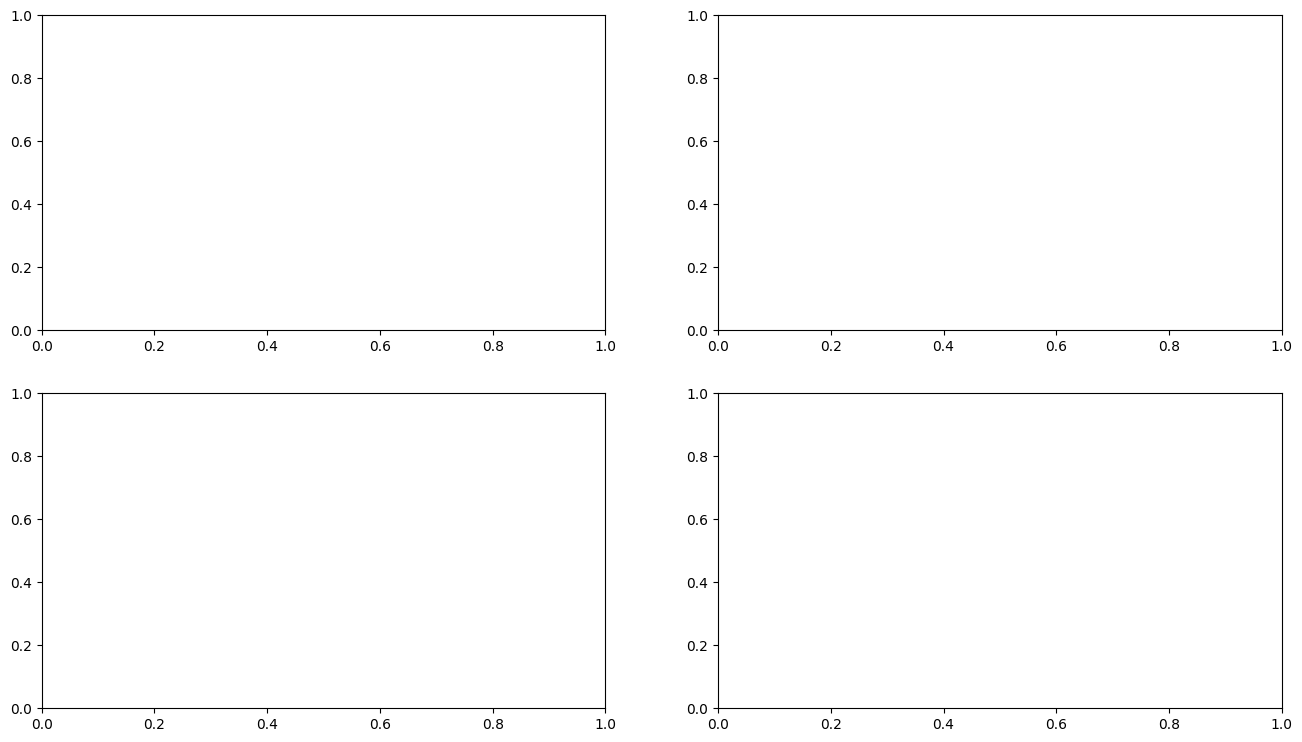

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# Function to annotate each bar with the amount
def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(value, index, f'{value:.2f}B', ha='left', va='center', fontsize=10)

# Plotting for 2018
sns.barplot(x='amount($)', y='sector', data=sector_year_funding_2018_reset, palette="viridis", ax=axes[0, 0])
annotate_bars(sector_year_funding_2018_reset, axes[0, 0])
axes[0, 0].set_title('Top 5 Sectors with Highest Growth in Funding in 2018')
axes[0, 0].set_xlabel('Average Growth in Funding (In Billions)')
axes[0, 0].set_ylabel('Top 5 Sectors in 2018')

# Plotting for 2019
sns.barplot(x='amount($)', y='sector', data=sector_year_funding_2019_reset, palette="viridis", ax=axes[0, 1])
annotate_bars(sector_year_funding_2019_reset, axes[0, 1])
axes[0, 1].set_title('Top 5 Sectors with Highest Growth in Funding in 2019')
axes[0, 1].set_xlabel('Average Growth in Funding (In Billions)')
axes[0, 1].set_ylabel('Top 5 Sectors in 2019')

# Plotting for 2020
sns.barplot(x='amount($)', y='sector', data=sector_year_funding_2020_reset, palette="viridis", ax=axes[1, 0])
annotate_bars(sector_year_funding_2020_reset, axes[1, 0])
axes[1, 0].set_title('Top 5 Sectors with Highest Growth in Funding in 2020')
axes[1, 0].set_xlabel('Average Growth in Funding (In Billions)')
axes[1, 0].set_ylabel('Top 5 Sectors in 2020')

# Plotting for 2021
sns.barplot(x='amount($)', y='sector', data=sector_year_funding_2021_reset, palette="viridis", ax=axes[1, 1])
annotate_bars(sector_year_funding_2021_reset, axes[1, 1])
axes[1, 1].set_title('Top 5 Sectors with Highest Growth in Funding in 2021')
axes[1, 1].set_xlabel('Average Growth in Funding (In Billions)')
axes[1, 1].set_ylabel('Top 5 Sectors in 2021')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [102]:
# #Convert the 'growth' values to billions
# sector_year_funding_2018_reset['growth_billions'] = sector_year_funding_2018_reset['amount($)'] / 1e9

# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_2018_reset, palette="viridis")

# plt.title('Top 5 Sectors with Highest Growth in Funding in 2018')
# plt.xlabel('Average Growth in Funding (In Billions)')
# plt.ylabel('Top 5 Sectors in 2018')
# plt.show()

In [103]:
# #Convert the 'growth' values to billions
# sector_year_funding_2019_reset['growth_billions'] = sector_year_funding_2019_reset['amount($)'] / 1e9

# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_2019_reset, palette="viridis")


# plt.title('Top 5 Sectors with Highest Growth in Funding in 2019')
# plt.xlabel('Average Growth in Funding (In Billions)')
# plt.ylabel('Top 5 Sectors in 2019')
# plt.show()

In [104]:
# #Convert the 'growth' values to billions
# sector_year_funding_2020_reset['growth_billions'] = sector_year_funding_2020_reset['amount($)'] / 1e9

# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_2020_reset, palette="viridis")


# plt.title('Top 5 Sectors with Highest Growth in Funding in 2020')
# plt.xlabel('Average Growth in Funding (In Billions)')
# plt.ylabel('Top 5 Sectors in 2020')
# plt.show()

In [105]:
# #Convert the 'growth' values to billions
# sector_year_funding_2021_reset['growth_billions'] = sector_year_funding_2021_reset['amount($)'] / 1e9

# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_2021_reset, palette="viridis")


# plt.title('Top 5 Sectors with Highest Growth in Funding in 2021')
# plt.xlabel('Average Growth in Funding (In Billions)')
# plt.ylabel('Top 5 Sectors in 2021')
# plt.show()

### What locations within India have emerged as the primary hubs for startup activity and investment, and what factors contribute to their prominence?

In [108]:
# # Grouping the dataset based on the headquarters
# startups_by_location = final_dataset.groupby('headquarter')['amount($)'].sum()

# #Reset index and get the top 10 locations
# top_10_locations = startups_by_location.reset_index().sort_values(by ='amount($)', ascending = False).head(10)

# # top_10_locations

# # #Convert the 'growth' values to billions
# top_10_locations['growth_billions'] = top_10_locations['amount($)'] / 1e9

# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# bar_plot = sns.barplot(x='growth_billions', y='headquarter', data=top_10_locations, palette="viridis")
# # Add the numbers near the bars
# for i, v in enumerate(top_10_locations['growth_billions']):
#     bar_plot.text(v + 3, i + .25, str(v), color='black', fontweight='light')

# plt.title('Top 10 locations with the Highest Startup activity and Investment')
# plt.xlabel('Average Investment in Funding (In Billions)')
# plt.ylabel('Top 10 locations')
# plt.show()

In [109]:
# Grouping the dataset based on the headquarters
startups_by_location = final_dataset.groupby('headquarter')['amount($)'].sum()
# Reset the index before assigning column names
top_10_locations_by_investment = startups_by_location.reset_index().sort_values(by ='amount($)', ascending = False).head(10)
top_10_locations_by_investment['growth_billions'] = top_10_locations_by_investment['amount($)'] / 1e9

# Assign column names
top_10_locations_by_investment.columns = ['headquarter', 'amount($)', 'growth_billions']
# top_10_locations_by_investment

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to retrieve coordinates for a location
def get_coordinates(location):
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            print(f"Warning: Coordinates not found for {location}. Skipping.")
            return None, None
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {str(e)}")
        return None, None

# Apply the function to get coordinates for each location
top_10_locations_by_investment[['Latitude', 'Longitude']] = top_10_locations_by_investment['headquarter'].apply(lambda x: pd.Series(get_coordinates(x)))
top_10_locations_by_investment

NameError: name 'Nominatim' is not defined

In [ ]:
# # Create a map centered around the first location
map_top_10_locations_by_investment= folium.Map(location=[top_10_locations_by_investment['Latitude'].iloc[0], top_10_locations_by_investment['Longitude'].iloc[0]], zoom_start=3)
marker_cluster = MarkerCluster().add_to(map_top_10_locations_by_investment)

# Add a marker for each location to the MarkerCluster
for idx, row in top_10_locations_by_investment.iterrows():
    radius = int(row['growth_billions'] / 1e9)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(('<strong><font color ="green">'+row['headquarter']+'</font></strong><br>'+
                            '<strong>Total Investment (Billions): </strong><font color ="blue">'+str(row['growth_billions'])+'</font><br>'), max_width=250),
    ).add_to(marker_cluster)
map_top_10_locations_by_investment

In [110]:
# startups_by_location2 = final_dataset['headquarter'].value_counts()

# # Reset index and get the top 10 locations
# top_10_locations2 = startups_by_location2.head(10).sort_values(ascending=False).reset_index()
# top_10_locations2.columns = ['headquarter', 'count']


# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x='count', y='headquarter', data=top_10_locations2, palette="viridis")

# # Add the numbers near the bars
# for i, v in enumerate(top_10_locations2['count']):
#     ax.text(v + 3, i + .25, str(v), color='black', fontweight='light')

# plt.title('Top 10 locations with the Highest Startups')
# plt.xlabel('Number of Startups')
# plt.ylabel('Top 10 locations')
# plt.show()


In [111]:
startups_by_location2 = final_dataset['headquarter'].value_counts()
top_10_locations = startups_by_location2.head(10).sort_values(ascending=False).reset_index()
top_10_locations.columns = ['Location', 'Number of Startups']

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to retrieve coordinates for a location
def get_coordinates(location):
    try:
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            print(f"Error retrieving coordinates for {location}: Location not found")
            return None, None
    except Exception as e:
        print(f"Error retrieving coordinates for {location}: {str(e)}")
        return None, None
# Apply the function to get coordinates for each location
top_10_locations[['Latitude', 'Longitude']] = top_10_locations['Location'].apply(lambda x: pd.Series(get_coordinates(x)))

NameError: name 'Nominatim' is not defined

In [112]:
top_10_locations

,Location,Number of Startups
0,Bangalore,881
1,Mumbai,466
2,New Delhi,235
3,Gurugram,230
4,Pune,113
5,Chennai,107
6,Delhi,94
7,Gurgaon,87
8,Noida,86
9,Hyderabad,81


In [113]:
# Create a map centered around the first location
map_top_10_locations = folium.Map(location=[top_10_locations['Latitude'].iloc[0], top_10_locations['Longitude'].iloc[0]], zoom_start=3)

# Create a MarkerCluster to cluster the markers
marker_cluster = MarkerCluster().add_to(map_top_10_locations)

# Add a marker for each location to the MarkerCluster
for idx, row in top_10_locations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(('<strong><font color ="green">'+row['Location']+'</font></strong><br>'+
                            '<strong>Number of Startups: </strong><font color ="blue">'+str(row['Number of Startups'])+'</font><br>'), max_width=250),
    ).add_to(marker_cluster)

# Display the map
map_top_10_locations

KeyError: 'Latitude'

In [114]:
# # # Grouping the dataset based on the headquarters
# startups_by_location2 = final_dataset['headquarter'].value_counts()

# #Reset index and get the top 10 locations
# top_10_locations2 = startups_by_location2.head(10).sort_values(ascending = False).reset_index()


# # Plotting using seaborn
# plt.figure(figsize=(10, 6))
# ax = sns.barplot(x='count', y='headquarter', data=top_10_locations2, palette="viridis")

# plt.title('Top 10 locations with the Highest Startups')
# plt.xlabel('Number of Startups')
# plt.ylabel('Top 10 locations')
# plt.show()


### Are there any notable differences in funding patterns between early-stage startups and more established companies?

In [115]:
#Getting the median year for the founded coulmn
overall_median_per_year  # The overall median year is 2016

final_dataset['stage_of_startup'] = np.where(final_dataset['founded'] >= overall_median_per_year, 'Early Stage', 'Established')


In [116]:
# Display the count of each category in the 'stage' column
stage_distribution = final_dataset['stage_of_startup'].value_counts()

# Print or visualize the distribution
print(stage_distribution)


stage_of_startup
Early Stage    2089
Established     790
Name: count, dtype: int64


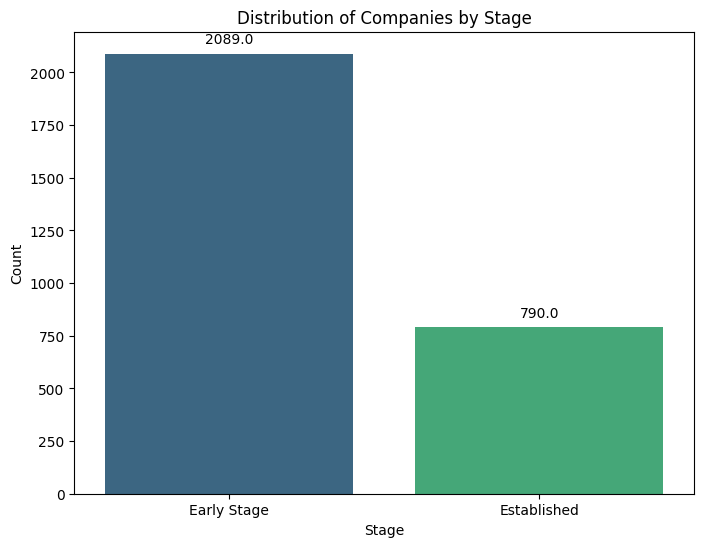

In [117]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot countplot for 'stage'
sns.countplot(x='stage_of_startup', data=final_dataset, ax=ax, palette="viridis")

# Display the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Companies by Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

#### Descriptive

In [118]:
early_stage_stats = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)'].describe()
established_stats = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)'].describe()

print("Early Stage Funding Statistics:")
print(early_stage_stats)

print("\nEstablished Funding Statistics:")
print(established_stats)


Early Stage Funding Statistics:
count    2.089000e+03
mean     8.348653e+07
std      3.281932e+09
min      8.789400e+02
25%      1.000000e+06
50%      3.000000e+06
75%      5.000000e+06
max      1.500000e+11
Name: amount($), dtype: float64

Established Funding Statistics:
count    7.900000e+02
mean     1.362897e+08
std      2.494406e+09
min      4.090000e+04
25%      3.000000e+06
50%      6.000000e+06
75%      3.000000e+07
max      7.000000e+10
Name: amount($), dtype: float64


####
**Mean Funding Amount:** Early-stage companies have a slightly lower mean funding amount ($83.88 million) compared to established companies ($136.97 million).

**Variability (Standard Deviation):** Both groups exhibit high variability in funding amounts, as indicated by the large standard deviations.

**Minimum and Maximum Funding:** Both groups have a wide range of funding amounts, with early-stage companies having a minimum of $720 and a maximum of $150 billion, while established companies range from $40,900 to $70 billion.

**Percentiles (Q1, Median, Q3):** Early-stage companies generally have lower funding amounts at each percentile compared to established companies.

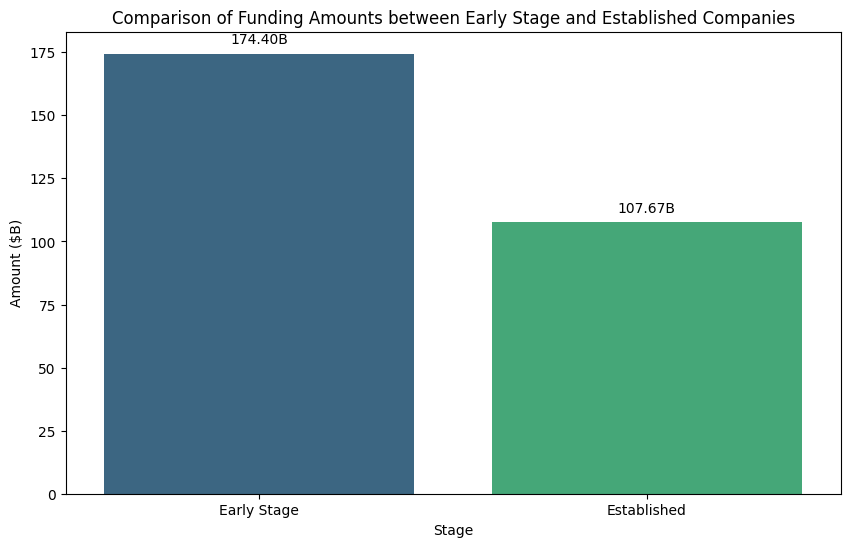

In [119]:
early_stage_startups = final_dataset.groupby('stage_of_startup')['amount($)'].sum().reset_index()
early_stage_startups['amount_in_billions'] = early_stage_startups['amount($)'] / 1e9

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='stage_of_startup', y='amount_in_billions', data=early_stage_startups, ci=None, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Comparison of Funding Amounts between Early Stage and Established Companies')
plt.xlabel('Stage')
plt.ylabel('Amount ($B)')
plt.show()

 

#### Hypothesis Testing

#### 
Null Hypothesis(H0): There is no significant difference in the average funding amounts between early-stage startups and established companies.

Alternative Hypothesis(H1): There is a significant difference in the average funding amounts between early-stage startups and established companies.

In [120]:
early_stage_funding = final_dataset[final_dataset['stage_of_startup'] == 'Early Stage']['amount($)']
established_funding = final_dataset[final_dataset['stage_of_startup'] == 'Established']['amount($)']

t_stat, p_value = ttest_ind(early_stage_funding, established_funding, nan_policy='omit')


# Set Significance level
alpha = 0.05
 
#Compare p-value to the significance level
if p_value < alpha:
    print('We reject the Null hypothesis.There is no significant difference in the average funding amounts between early_stage startups and established companies')
else:
   print("We fail to reject the Null hypothesis")


# print(f"T-statistic: {t_stat}")
# print(f"P-value: {p_value}")

We fail to reject the Null hypothesis


### Which sectors recieve the lowest level of funding and which sectors recieve the highest levels of funding in India

In [121]:
# Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).head(5)

# Convert the 'growth' values to billions
sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['growth_billions']):
        ax.text(value, index, f'{value:.2f}B', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='growth_billions', y='sector', data=sector_year_funding_reset, palette="viridis")

plt.title('Top 5 Sectors with Highest Growth in Funding')
plt.xlabel('Average Growth in Funding (In Billions)')
plt.ylabel('Top 5 Sectors')

# Annotate the bars with values
annotate_bars(sector_year_funding_reset, ax)
plt.show()
sector_year_funding_reset

TypeError: unhashable type: 'Series'

In [123]:
#Group data by sector and get the sum of the amount
sector_year_funding = final_dataset.groupby('sector')['amount($)'].sum()
sector_year_funding_reset = sector_year_funding.reset_index().sort_values(by='amount($)', ascending=False).tail(5)

#Convert the 'growth' values to billions
# sector_year_funding_reset['growth_billions'] = sector_year_funding_reset['amount($)'] / 1e9

def annotate_bars(data, ax):
    for index, value in enumerate(data['amount($)']):
        ax.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='amount($)', y='sector', data=sector_year_funding_reset, palette="viridis")

annotate_bars(sector_year_funding_reset,ax)
plt.title('Least 5 Sectors with Lowest Growth in Funding')
plt.xlabel('Average Growth in Funding (In Thousands)')
plt.ylabel('Least 5 Sectors')
plt.show()
sector_year_funding_reset

TypeError: unhashable type: 'Series'

### Which investors have more impact on startups over the years?

In [124]:
# Group by investor and sum the investment amounts
investor_impact = final_dataset.groupby('investor')['amount($)'].sum()

# Get the top 10 investors with the highest total investment amounts
top_10_investors = investor_impact.nlargest(10)

#Return top 10 investors
top_10_investors

# Reset index and rename the columns
top_10_investors_reset = top_10_investors.reset_index()
top_10_investors_reset.columns = ['Investor', 'amount']
top_10_investors_reset

,Investor,amount
0,"Silver Lake, Mubadala Investment Company",7.000000e+10
1,"Salesforce Ventures, Dragoneer Investment Group",3.000000e+09
2,"Facebook, Google, KKR, Silver Lake",2.200000e+09
3,Tiger Global,1.417000e+09
4,"Owl Ventures, Tiger Global Management",1.200000e+09
5,"Canaan Valley Capital, Glade Brook Capital Par...",1.000000e+09
6,"Falcon Edge, DST Global, D1 Capital, Redbird C...",8.400000e+08
7,"Carmignac, Falcon Edge Capital",8.000000e+08
8,"General Atlantic, Kohlberg Kravis Roberts",8.000000e+08
9,"Kora, Tiger Global Management",7.120000e+08


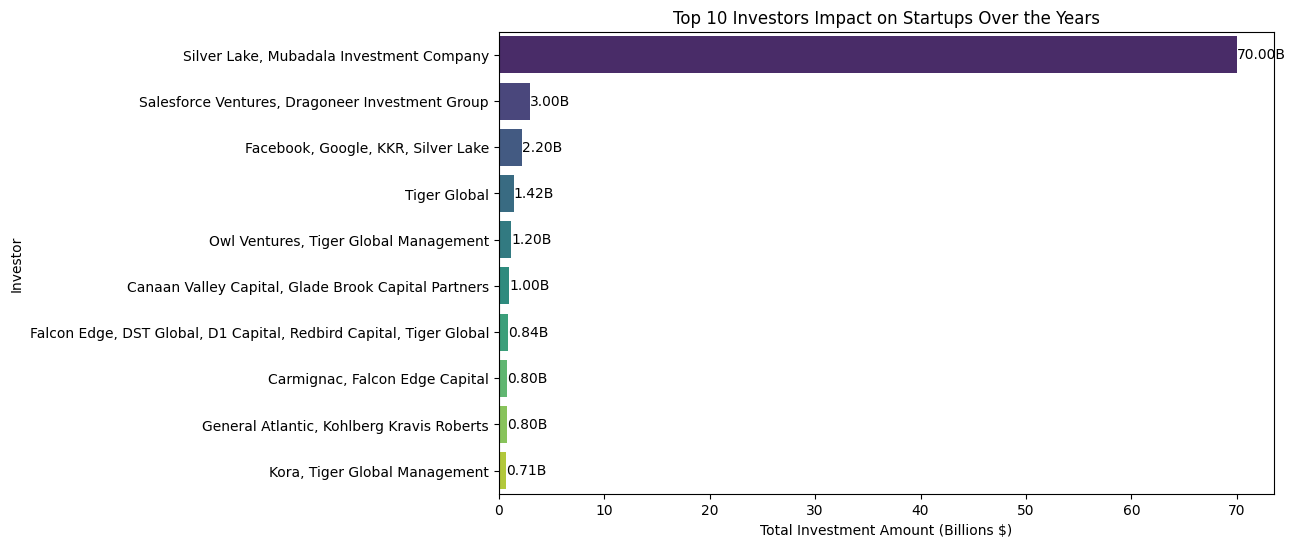

In [125]:
# Convert the 'amount' values to billions
top_10_investors_reset['amount_billions'] = top_10_investors_reset['amount'] / 1e9

# Sort the DataFrame by 'amount_billions' column in descending order
top_10_investors_reset = top_10_investors_reset.sort_values(by='amount_billions', ascending=False)

# Plotting using seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='amount_billions', y='Investor', data=top_10_investors_reset, palette="viridis")

# Add data labels
for index, row in top_10_investors_reset.iterrows():
    bar_plot.text(row['amount_billions'], index, f'{row["amount_billions"]:.2f}B', va='center')

plt.title('Top 10 Investors Impact on Startups Over the Years')
plt.xlabel('Total Investment Amount (Billions $)')
plt.ylabel('Investor')
plt.show()



Made with 💖 [Team Curium](https://github.com/MumoMutiso/Indian-startup-collab)
<span style="color: #aaaaaa;">2024</span>